# Introduction to Calculus – Differentiation, Integration & Free Fall (Euler Method)

This notebook introduces differentiation, integration, and differential equations through the motion of a freely falling object.
It includes symbolic calculations using SymPy, numerical simulation using the Euler method, and visualizations for better understanding.

## 1. Differentiation

Derivative definition (limit approach):

$$\frac{df}{dx} = \lim_{\Delta x \to 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Represents the instantaneous rate of change.

### Common derivatives table

| Function | Derivative |
|----------|------------|
| c | 0 |
| $x^n$ | $n x^{n-1}$ |
| $e^x$ | $e^x$ |
| ln(x) | 1/x |
| sin(x) | cos(x) |
| cos(x) | -sin(x) |
| tan(x) | $sec^2(x)$ |
| $e^{kx}$ | $k e^{kx}$ |
| $a^x$ | $a^x ln(a)$ |

In [9]:

import sympy as sp
x = sp.Symbol('x')
f = 3*x**3 - 5*x**2 + 2*x - 7
f_prime = sp.diff(f, x)
f_prime, [f_prime.subs(x,val) for val in [0,1,2]]


(9*x**2 - 10*x + 2, [2, 1, 18])

## 2. Integration

Integral definition (limit of sums / Riemann sum):

$$\int_a^b f(x) dx = \lim_{\Delta x \to 0} \sum_i f(x_i) \Delta x$$

Represents the **area under the curve** between a and b.

### Common integrals table

| Function | Integral |
|----------|---------|
| c | c x + C |
| $x^n$ | $x^{n+1}/(n+1)$ + C |
| $e^x$ | $e^x$ + C |
| 1/x | ln|x| + C |
| sin(x) | -cos(x) + C |
| cos(x) | sin(x) + C |
| tan(x) | -ln|cos(x)| + C |
| $e^{kx}$ | $(1/k) e^{kx}$ + C |
| $a^x$ | $a^x/ln(a)$ + C |

In [2]:

# Symbolic integration demo
x = sp.Symbol('x')
f = 3*x**3 - 5*x**2 + 2*x - 7
F = sp.integrate(f, x)   # indefinite integral
F_def = sp.integrate(f, (x, 0, 2))  # definite integral from 0 to 2
F, F_def


(3*x**4/4 - 5*x**3/3 + x**2 - 7*x, -34/3)

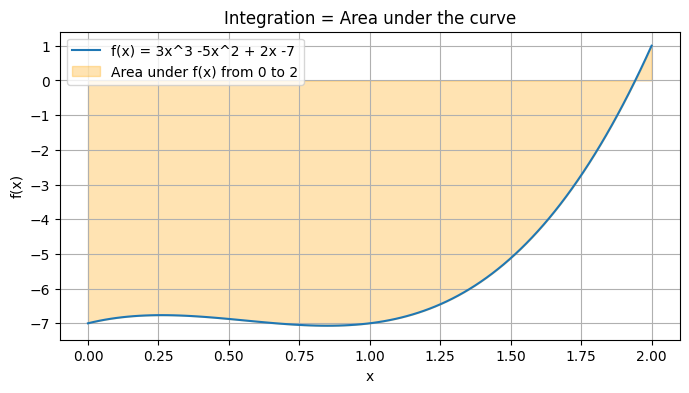

In [3]:

import numpy as np
import matplotlib.pyplot as plt

f_func = lambda x: 3*x**3 - 5*x**2 + 2*x - 7
x_vals = np.linspace(0, 2, 100)
y_vals = f_func(x_vals)

plt.figure(figsize=(8,4))
plt.plot(x_vals, y_vals, label='f(x) = 3x^3 -5x^2 + 2x -7')
plt.fill_between(x_vals, y_vals, 0, color='orange', alpha=0.3, label='Area under f(x) from 0 to 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Integration = Area under the curve')
plt.legend()
plt.grid(True)
plt.show()


## 3. Application: Free Fall (Euler Method)

Forward Euler method for motion:

$$v_{n+1} = v_n + a_n \Delta t, \quad s_{n+1} = s_n + v_n \Delta t$$

Acceleration is constant: a = g = 9.81 m/s^2

In [ ]:

import pandas as pd

# Parameters
g = 9.81
T = 6.0
dt_coarse = 1.0
dt_fine = 0.1

def euler_freefall(dt, T, g=9.81):
    n_steps = int(np.round(T/dt))
    t = np.linspace(0, n_steps*dt, n_steps+1)
    s = np.zeros_like(t)
    v = np.zeros_like(t)
    a = np.ones_like(t)*g
    for n in range(n_steps):
        v[n+1] = v[n] + a[n]*dt
        s[n+1] = s[n] + v[n]*dt
    return t, s, v, a

t1, s1, v1, a1 = euler_freefall(dt_coarse, T)
t2, s2, v2, a2 = euler_freefall(dt_fine, T)

# Analytical solution
t_analytical = np.linspace(0,T,301)
s_analytic = 0.5*g*t_analytical**2
v_analytic = g*t_analytical
a_analytic = np.ones_like(t_analytical)*g

# Tables
df_coarse = pd.DataFrame({"Time (s)": t1, "Displacement (m)": np.round(s1,3),
                          "Velocity (m/s)": np.round(v1,3), "Acceleration (m/s^2)": a1})
df_fine = pd.DataFrame({"Time (s)": t2, "Displacement (m)": np.round(s2,3),
                        "Velocity (m/s)": np.round(v2,3), "Acceleration (m/s^2)": a2})

# df_coarse, df_fine.head(10)


(   Time (s)  Displacement (m)  Velocity (m/s)  Acceleration (m/s^2)
 0       0.0              0.00            0.00                  9.81
 1       1.0              0.00            9.81                  9.81
 2       2.0              9.81           19.62                  9.81
 3       3.0             29.43           29.43                  9.81
 4       4.0             58.86           39.24                  9.81
 5       5.0             98.10           49.05                  9.81
 6       6.0            147.15           58.86                  9.81,
    Time (s)  Displacement (m)  Velocity (m/s)  Acceleration (m/s^2)
 0       0.0             0.000           0.000                  9.81
 1       0.1             0.000           0.981                  9.81
 2       0.2             0.098           1.962                  9.81
 3       0.3             0.294           2.943                  9.81
 4       0.4             0.589           3.924                  9.81
 5       0.5             0.981   

In [10]:

# Show full coarse table and a truncated fine table for readability in the notebook
import IPython.display as disp

print("### Coarse (Δt = 1.0 s)")
disp.display(df_coarse)

print("\n### Fine (Δt = 0.1 s) — first 20 rows")
disp.display(df_fine.head(50))


### Coarse (Δt = 1.0 s)


,Time (s),Displacement (m),Velocity (m/s),Acceleration (m/s^2)
0,0.0,0.00,0.00,9.81
1,1.0,0.00,9.81,9.81
2,2.0,9.81,19.62,9.81
3,3.0,29.43,29.43,9.81
4,4.0,58.86,39.24,9.81
5,5.0,98.10,49.05,9.81
6,6.0,147.15,58.86,9.81



### Fine (Δt = 0.1 s) — first 20 rows


,Time (s),Displacement (m),Velocity (m/s),Acceleration (m/s^2)
0,0.0,0.000,0.000,9.81
1,0.1,0.000,0.981,9.81
2,0.2,0.098,1.962,9.81
3,0.3,0.294,2.943,9.81
4,0.4,0.589,3.924,9.81
5,0.5,0.981,4.905,9.81
6,0.6,1.472,5.886,9.81
7,0.7,2.060,6.867,9.81
8,0.8,2.747,7.848,9.81
9,0.9,3.532,8.829,9.81


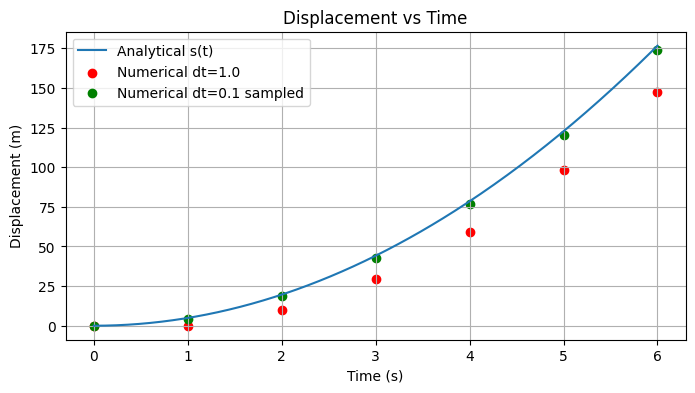

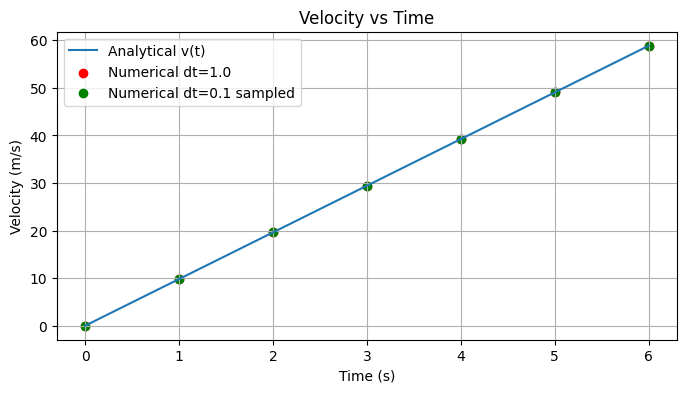

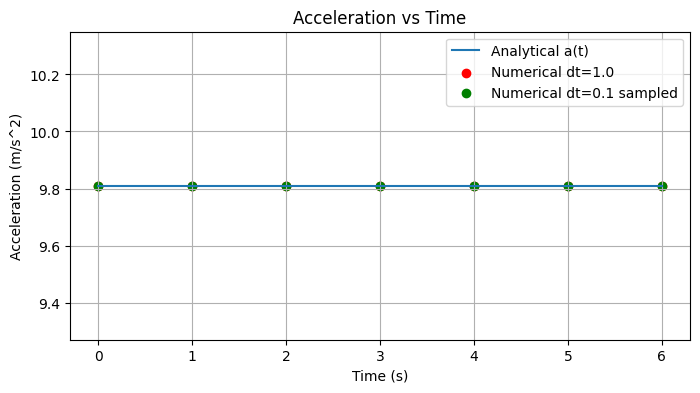

In [5]:

# Displacement plot
plt.figure(figsize=(8,4))
plt.plot(t_analytical, s_analytic, label='Analytical s(t)')
plt.scatter(t1, s1, color='red', label=f'Numerical dt={dt_coarse}')
plt.scatter(t2[::10], s2[::10], color='green', label=f'Numerical dt={dt_fine} sampled')
plt.xlabel('Time (s)'); plt.ylabel('Displacement (m)')
plt.title('Displacement vs Time'); plt.legend(); plt.grid(True); plt.show()

# Velocity plot
plt.figure(figsize=(8,4))
plt.plot(t_analytical, v_analytic, label='Analytical v(t)')
plt.scatter(t1, v1, color='red', label=f'Numerical dt={dt_coarse}')
plt.scatter(t2[::10], v2[::10], color='green', label=f'Numerical dt={dt_fine} sampled')
plt.xlabel('Time (s)'); plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time'); plt.legend(); plt.grid(True); plt.show()

# Acceleration plot
plt.figure(figsize=(8,4))
plt.plot(t_analytical, a_analytic, label='Analytical a(t)')
plt.scatter(t1, a1, color='red', label=f'Numerical dt={dt_coarse}')
plt.scatter(t2[::10], a2[::10], color='green', label=f'Numerical dt={dt_fine} sampled')
plt.xlabel('Time (s)'); plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time'); plt.legend(); plt.grid(True); plt.show()


## Conclusion
- Differentiation represents rate of change (velocity, slope).
- Integration represents area under curve (accumulated quantity).
- Euler method approximates motion; finer steps converge to analytical solution.
- SymPy allows exact symbolic differentiation and integration.